<a href="https://colab.research.google.com/github/sujal-prakash15/Machine_learning/blob/master/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/SVM Classification/Social_Network_Ads.csv')

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x)

In [ ]:
print(y)

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Training the SVM model on the Training set

In [9]:
from sklearn.svm import SVC
sv=SVC(random_state=0,kernel='linear')
sv.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

## Predicting a new result

In [11]:
print(sv.predict(sc.transform([[31,14000]])))

[0]


## Predicting the Test set results

In [ ]:
np.printoptions(precision=2)
pred=sv.predict(X_test)
print(np.concatenate((pred.reshape(-1,1),Y_test.reshape(-1,1)),1))

## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,pred)
print(cm)
accuracy_score(Y_test,pred)

[[42  6]
 [ 7 25]]


0.8375

## Visualising the Training set results

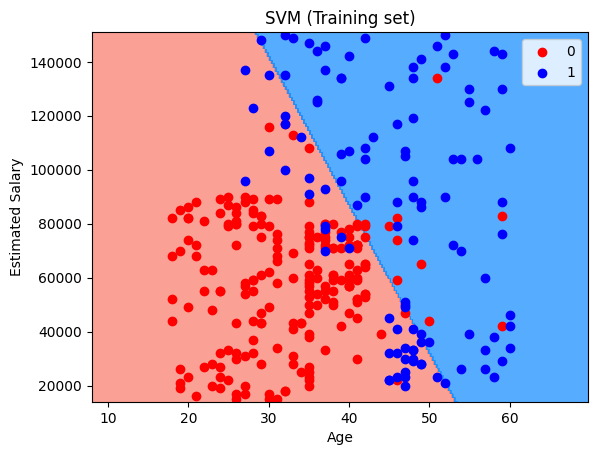

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train),Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, sv.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

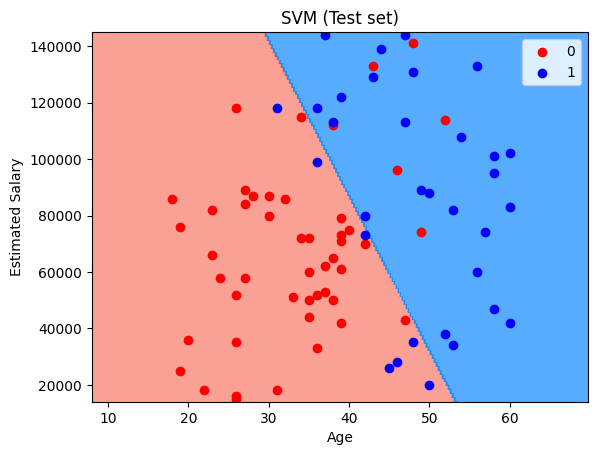

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test),Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, sv.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()